In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
house_data = pd.read_csv('datasets/kc_house_data.csv')

house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
house_data.drop(['id', 'lat', 'long', 'zipcode'], inplace=True, axis=1)

house_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503


In [4]:
house_data.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503
5,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,4760,101930
6,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,2238,6819
7,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,1650,9711
8,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,1780,8113
9,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,2390,7570


In [6]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 17 columns):
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(3), int64(13), object(1)
memory usage: 2.8+ MB


In [7]:
house_data['date'] = pd.to_datetime(house_data['date'])
house_data['house_age'] = house_data['date'].dt.year - house_data['yr_built']

house_data.drop('date', inplace=True, axis=1)
house_data = house_data.drop('yr_built', axis=1)

In [8]:
house_data['renovated'] = house_data['yr_renovated'].apply(lambda x:0 if x == 0 else 1)

house_data.drop('yr_renovated', inplace=True, axis=1)

In [9]:
house_data[['renovated', 'house_age']].sample(10)

,renovated,house_age
285,0,22
1949,1,72
433,0,9
15012,0,54
15080,0,46
5061,0,63
21093,0,5
20684,0,6
14564,0,20
17742,0,30


In [10]:
house_data.to_csv('datasets/house_data_processed.csv', index=False)

C:\Users\DHRUV\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


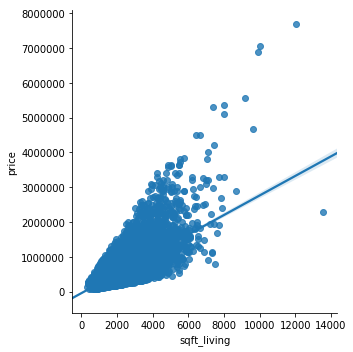

In [11]:
sns.lmplot('sqft_living', 'price', house_data)

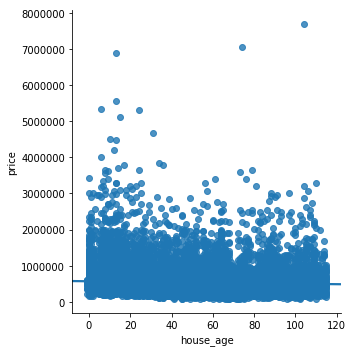

In [12]:
sns.lmplot('house_age', 'price', house_data)

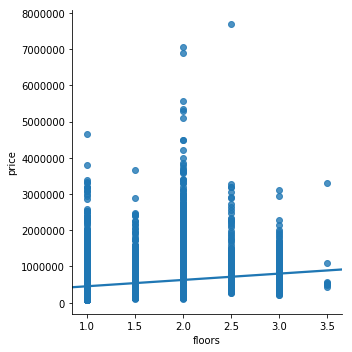

In [13]:
sns.lmplot('floors', 'price', house_data)

#Scaling dataset and one feature for simple linear regression

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [15]:
X = house_data[['sqft_living']]

y = house_data['price']

In [16]:
X.head()

,sqft_living
0,1180
1,2570
2,770
3,1960
4,1680


In [17]:
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.2)

In [19]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

C:\Users\DHRUV\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\DHRUV\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [20]:
X_test = scaler.transform(X_test)

C:\Users\DHRUV\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [21]:
linear_regression = LinearRegression()

model = linear_regression.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [22]:
df = pd.DataFrame({'test': y_test, 'predicted': y_pred})

df.sample(10)

,test,predicted
17283,529000.0,293845.976749
20748,395000.0,662741.086438
2074,767500.0,634364.539538
1743,508000.0,892591.116320
7028,567000.0,537884.280081
997,553500.0,191690.407912
20540,375000.0,319384.868958
22,285000.0,594637.373880
10453,577000.0,500994.769113
8119,285000.0,418986.548574


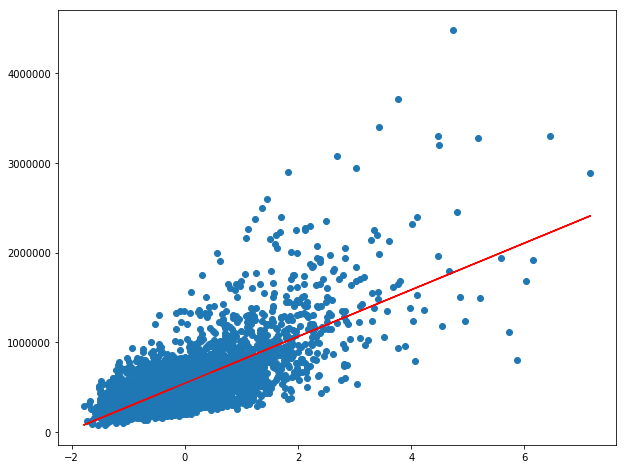

In [23]:
plt.figure(figsize=(10, 8))

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

plt.show()

In [24]:
print("Training score : ", linear_regression.score(X_train, y_train))

Training score :  0.49164559141694275


In [25]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred)

print("Testing score : ", score)

Testing score :  0.4978027432923392


In [26]:
theta_0 = linear_regression.coef_
theta_0

array([260855.46540814])

In [27]:
intercept = linear_regression.intercept_
intercept

541809.4835743204

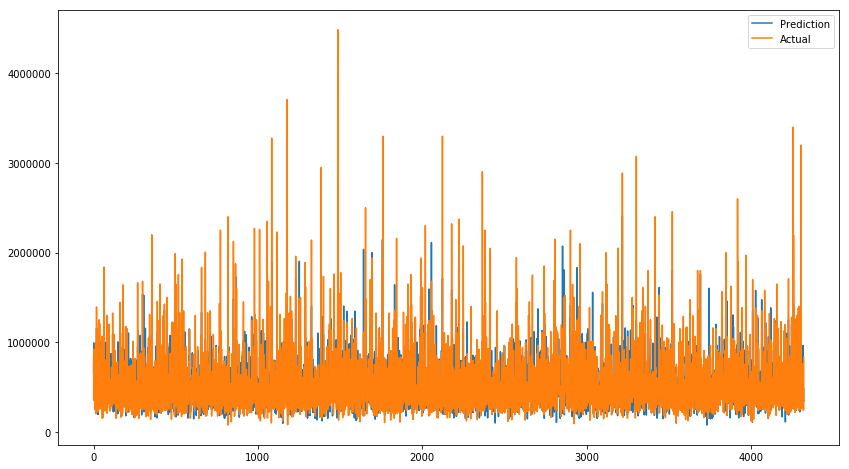

In [28]:
plt.subplots(figsize=(14,8))

plt.plot(y_pred, label="Prediction")
plt.plot(y_test.values, label="Actual")

plt.legend()

plt.show()

In [29]:
import statsmodels.api as sm

In [30]:
X_train[:5]

array([[ 0.12637001],
       [-0.54808238],
       [-0.09119528],
       [-1.01584774],
       [ 4.0860582 ]])

In [31]:
X_train = sm.add_constant(X_train)

X_train[:5]

array([[ 1.        ,  0.12637001],
       [ 1.        , -0.54808238],
       [ 1.        , -0.09119528],
       [ 1.        , -1.01584774],
       [ 1.        ,  4.0860582 ]])

In [32]:
model = sm.OLS(y_train, X_train).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                 1.672e+04
Date:                Tue, 14 Jul 2020   Prob (F-statistic):               0.00
Time:                        17:53:56   Log-Likelihood:            -2.4046e+05
No. Observations:               17290   AIC:                         4.809e+05
Df Residuals:                   17288   BIC:                         4.809e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.418e+05   2017.366    268.573      0.0

In [33]:
theta_0, intercept

(array([260855.46540814]), 541809.4835743204)